# Modelando o CSV
Modificações iniciais no dataset para adequá-lo mais ao modelo.



**Importação de bibliotecas do Python:**

* Drive: Para acessar o Google Drive onde o CSV está localizado
* Pandas: Para a manipulação e análise dos dados
* Matplotlib: Para a criação de gráficos
* Numpy: Para a manipulação de arrays




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Leitura do CSV**

Do Google Drive, pegamos o csv criado para predição e removemos uma coluna não usada.

In [ ]:
df_teste = pd.read_csv('drive/MyDrive/Colab Notebooks/df_dados_cliente_totais_novos.csv')
del df_teste['Unnamed: 0']

**Hora e Minuto**

Criamos uma coluna contendo a informação de hora e minuto em forma de decimal, uma vez que, o modelo lê melhor a informação de minuto se ela estiver integrada à hora.

In [ ]:
df_teste["Hora e Minuto"] = df_teste['Hora'] + + df_teste["Minuto"]/60

**Remoção das colunas não usadas para previsão**

Removemos o programa, já que não podemos usá-lo como feature, e o gênero, hora e minuto, já que eles não tem importância para a predição do KNN e acabam só deixando o dataset mais poluído e mais lentom Mesmo removendo a coluna de Gênero, pegamos a informação de Jornalismo, que provou ser de alta importância para o modelo.

In [ ]:
df_teste.drop(['Programa'], axis=1, inplace=True)
df_teste.drop(['Gênero'], axis=1, inplace=True)
df_teste.drop(['Hora'], axis=1, inplace=True)
df_teste.drop(['Minuto'], axis=1, inplace=True)

**Label encoding**

Aplicamos o label encoding (técnica utilizada para transformar informações categóricas em informações numéricas) na coluna "Dia da Semana"


In [ ]:
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Domingo', 1, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Segunda', 2, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Terça', 3, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Quarta', 4, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Quinta', 5, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Sexta', 6, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Sábado', 7, inplace=True)
df_teste['Dia da Semana'] = pd.to_numeric(df_teste['Dia da Semana'], errors='coerce')

In [ ]:
df_teste

,Ano,Mês,Dia,Dia da Semana,Total de Domicílios,Masculino,Feminino,AB,C1,C2,DE,4-11 anos,12-17 anos,18-24 anos,25-34 anos,35-49 anos,50-59 anos,60+ anos,Total de Indivíduos,Masculino FID,Feminino FID,AB FID,C1 FID,C2 FID,DE FID,4-11 anos FID,12-17 anos FID,18-24 anos FID,25-34 anos FID,35-49 anos FID,50-59 anos FID,60+ anos FID,Total de Domicílios SHR,Masculino SHR,Feminino SHR,AB SHR,C1 SHR,C2 SHR,DE SHR,4-11 anos SHR,12-17 anos SHR,18-24 anos SHR,25-34 anos SHR,35-49 anos SHR,50-59 anos SHR,60+ anos SHR,Feriado,Hora e Minuto
0,2015,1,1,5,1.09,0.30,0.40,0.00,1.52,0.00,0.00,0.0,0.00,1.18,0.0,0.00,1.73,0.00,100.00,100.00,100.00,0.00,100.0,0.00,0.0,0.0,0.0,100.0,0.0,0.00,100.0,0.00,34.08,15.37,57.73,0.00,67.40,0.00,0.00,0.0,0.00,100.00,0.0,0.00,100.00,0.00,True,6.000000
1,2015,1,1,5,1.09,0.30,0.40,0.00,1.52,0.00,0.00,0.0,0.00,1.18,0.0,0.00,1.73,0.00,100.00,100.00,100.00,0.00,100.0,0.00,0.0,0.0,0.0,100.0,0.0,0.00,100.0,0.00,34.08,15.37,57.73,0.00,67.40,0.00,0.00,0.0,0.00,100.00,0.0,0.00,100.00,0.00,True,6.083333
2,2015,1,1,5,1.09,0.30,0.40,0.00,1.52,0.00,0.00,0.0,0.00,1.18,0.0,0.00,1.73,0.00,100.00,100.00,100.00,0.00,100.0,0.00,0.0,0.0,0.0,100.0,0.0,0.00,100.0,0.00,34.08,15.37,57.73,0.00,67.40,0.00,0.00,0.0,0.00,100.00,0.0,0.00,100.00,0.00,True,6.166667
3,2015,1,1,5,1.09,0.30,0.40,0.00,1.52,0.00,0.00,0.0,0.00,1.18,0.0,0.00,1.73,0.00,100.00,100.00,100.00,0.00,100.0,0.00,0.0,0.0,0.0,100.0,0.0,0.00,100.0,0.00,34.08,15.37,57.73,0.00,67.40,0.00,0.00,0.0,0.00,100.00,0.0,0.00,100.00,0.00,True,6.250000
4,2015,1,1,5,1.09,0.30,0.40,0.00,1.52,0.00,0.00,0.0,0.00,1.18,0.0,0.00,1.73,0.00,100.00,100.00,100.00,0.00,100.0,0.00,0.0,0.0,0.0,100.0,0.0,0.00,100.0,0.00,34.08,15.37,57.73,0.00,67.40,0.00,0.00,0.0,0.00,100.00,0.0,0.00,100.00,0.00,True,6.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788539,2022,7,1,6,1.67,0.17,0.92,0.30,0.41,1.03,0.53,0.0,0.96,0.25,0.0,1.41,0.00,0.71,76.00,100.00,72.93,100.00,100.0,70.95,60.0,0.0,100.0,20.0,0.0,100.00,0.0,60.00,24.30,5.70,17.88,12.09,27.88,18.67,6.49,0.0,19.77,21.12,0.0,43.45,0.00,13.73,False,5.583333
788540,2022,7,1,6,1.97,0.17,1.07,0.30,0.41,1.45,0.35,0.0,0.96,1.25,0.0,1.41,0.00,0.47,86.88,100.00,85.20,100.00,100.0,100.00,40.0,0.0,100.0,100.0,0.0,100.00,0.0,40.00,27.12,5.70,20.04,12.09,27.88,24.45,4.33,0.0,19.77,57.25,0.0,43.45,0.00,9.15,False,5.666667
788541,2022,7,1,6,2.22,0.17,1.26,0.30,0.41,1.45,0.88,0.0,0.96,1.25,0.0,1.41,0.00,1.18,100.00,100.00,100.00,100.00,100.0,100.00,100.0,0.0,100.0,100.0,0.0,100.00,0.0,100.00,29.25,5.78,21.89,9.77,27.88,24.45,10.97,0.0,19.77,57.25,0.0,34.61,0.00,22.88,False,5.750000
788542,2022,7,1,6,2.71,0.37,1.42,0.54,0.41,1.81,0.88,0.0,0.96,1.25,0.0,1.74,0.00,1.88,82.97,73.76,85.57,60.25,100.0,88.33,100.0,0.0,100.0,100.0,0.0,77.78,0.0,80.11,32.82,11.08,24.66,16.59,27.88,28.75,10.82,0.0,17.46,57.25,0.0,42.75,0.00,32.10,False,5.833333


# Criando o KNN

 **Criação de dataframes para o modelo de totais de domicílios**

 Criamos uma variável para guardar as informações do CSV modelado acima e criamos uma variável contendo apenas as informações que queremos prever.

In [ ]:
df_both = df_teste
#y = df_both[['Total de Domicílios','Masculino','Feminino','AB','C1','C2','DE','4-11 anos','12-17 anos','18-24 anos','25-34 anos','35-49 anos','50-59 anos','60+ anos','Total de Indivíduos','Masculino FID','Feminino FID','AB FID','C1 FID','C2 FID','DE FID','4-11 anos FID','12-17 anos FID','18-24 anos FID','25-34 anos FID','35-49 anos FID','50-59 anos FID','60+ anos FID','Total de Domicílios SHR','Masculino SHR','Feminino SHR','AB SHR','C1 SHR','C2 SHR','DE SHR','4-11 anos SHR','12-17 anos SHR','18-24 anos SHR','25-34 anos SHR','35-49 anos SHR','50-59 anos SHR','60+ anos SHR']]
#y = df_both[['Total de Domicílios', 'Total de Domicílios SHR', 'Total de Indivíduos']]
#y = df_both[['Total de Domicílios','Masculino','Feminino','AB','C1','C2','DE','4-11 anos','12-17 anos','18-24 anos','25-34 anos','35-49 anos','50-59 anos','60+ anos']]
y = df_both['Total de Domicílios']

**Remoção do output desejado**

Removemos o output desejado, afinal, se queremos prever ele, não faria sentido usá-lo como feature, e por isso removemos.


In [ ]:
df_both.drop(['Total de Domicílios'], axis=1, inplace=True)
df_both.drop(['Masculino'], axis=1, inplace=True)
df_both.drop(['Feminino'], axis=1, inplace=True)
df_both.drop(['AB'], axis=1, inplace=True)
df_both.drop(['C1'], axis=1, inplace=True)
df_both.drop(['C2'], axis=1, inplace=True)
df_both.drop(['DE'], axis=1, inplace=True)
df_both.drop(['4-11 anos'], axis=1, inplace=True)
df_both.drop(['12-17 anos'], axis=1, inplace=True)
df_both.drop(['18-24 anos'], axis=1, inplace=True)
df_both.drop(['25-34 anos'], axis=1, inplace=True)
df_both.drop(['35-49 anos'], axis=1, inplace=True)
df_both.drop(['50-59 anos'], axis=1, inplace=True)
df_both.drop(['60+ anos'], axis=1, inplace=True)
df_both.drop(['Total de Indivíduos'], axis=1, inplace=True)
df_both.drop(['Masculino FID'], axis=1, inplace=True)
df_both.drop(['Feminino FID'], axis=1, inplace=True)
df_both.drop(['AB FID'], axis=1, inplace=True)
df_both.drop(['C1 FID'], axis=1, inplace=True)
df_both.drop(['C2 FID'], axis=1, inplace=True)
df_both.drop(['DE FID'], axis=1, inplace=True)
df_both.drop(['4-11 anos FID'], axis=1, inplace=True)
df_both.drop(['12-17 anos FID'], axis=1, inplace=True)
df_both.drop(['18-24 anos FID'], axis=1, inplace=True)
df_both.drop(['25-34 anos FID'], axis=1, inplace=True)
df_both.drop(['35-49 anos FID'], axis=1, inplace=True)
df_both.drop(['50-59 anos FID'], axis=1, inplace=True)
df_both.drop(['60+ anos FID'], axis=1, inplace=True)
df_both.drop(['Total de Domicílios SHR'], axis=1, inplace=True)
df_both.drop(['Masculino SHR'], axis=1, inplace=True)
df_both.drop(['Feminino SHR'], axis=1, inplace=True)
df_both.drop(['AB SHR'], axis=1, inplace=True)
df_both.drop(['C1 SHR'], axis=1, inplace=True)
df_both.drop(['C2 SHR'], axis=1, inplace=True)
df_both.drop(['DE SHR'], axis=1, inplace=True)
df_both.drop(['4-11 anos SHR'], axis=1, inplace=True)
df_both.drop(['12-17 anos SHR'], axis=1, inplace=True)
df_both.drop(['18-24 anos SHR'], axis=1, inplace=True)
df_both.drop(['25-34 anos SHR'], axis=1, inplace=True)
df_both.drop(['35-49 anos SHR'], axis=1, inplace=True)
df_both.drop(['50-59 anos SHR'], axis=1, inplace=True)
df_both.drop(['60+ anos SHR'], axis=1, inplace=True)

**Divisão entre dados de treinamento e dados de resultado**

Usando a biblioteca "train_test_split" dividimos nosso dataset para treino e para teste.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_both, y, test_size=0.15, shuffle=True)

**Aplicando a regressão KNN**

Aqui, importamos a biblioteca do KNN, selecionamos a quantidade de vizinhos de K (n_neighbors) e inserimos os datasets de treino no modelo.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=2, p=2)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

**Teste**

Criamos uma varíavel usando a parte separada para testes no modelo treinado, assim, obtendo uma variável contendo os dados preditos.

In [ ]:
test_pred = clf.predict(X_test)

**Métricas do teste**

Para vermos o quão bem sucedido o modelo foi, comparamos a predição do teste com seu valor real, e checamos:
- R quadrado
- Erro médio absoluto
- Erro médio quadrático


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(y_test, test_pred)) #R quadrado
print(mean_absolute_error(y_test, test_pred)) #erro médio absoluto
print(mean_squared_error(y_test, test_pred)) #erro médio quadrático

0.9914203379733273
0.46964639590132057
0.5431202530816185


**Predição do treino**

Para checarmos o sucesso do treino, criamos mais uma variável contendo uma predição simulada dos dados usados para o treinamento do modelo.

In [ ]:
train_pred = clf.predict(X_train)

**Métricas do treinamento**

Como feito no teste, comparamos a predição do treino com seu valor respectivo real, e obtemos:
- R quadrado
- Erro médio absoluto
- Erro médio quadrático

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(y_train, train_pred)) #R quadrado
print(mean_absolute_error(y_train, train_pred)) #erro médio absoluto
print(mean_squared_error(y_train, train_pred)) #erro médio quadrático

0.9964161511643466
0.31198547732080883
0.22678102182430152


# Gráficos e comparações

**Gráfico de comparação**

Para termos uma visualização melhor, criamos um gráfico tendo como eixo X os valores reais, e como eixo Y, os valores preditos pelo modelo, onde, quanto mais próximo o gráfico estiver de uma linha reta, mais bem sucedida foi a predição.

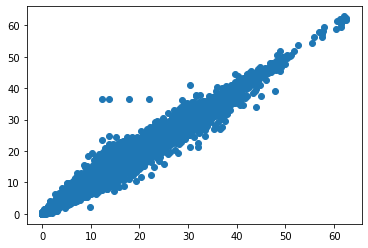

In [ ]:
plt.scatter(y_test,test_pred)

**Dataframe de comparação**

Criamos um novo dataframe contendo apenas as informações da predição e a informação do valor real, assim, conseguimos ver lado a lado os valores.

In [ ]:
results = {'Valor real': y_test, 'Predição': test_pred}
df_results = pd.DataFrame(data=results)
df_results

,Valor real,Predição
487271,3.17,3.630
715498,8.66,8.985
786780,1.90,1.900
654735,6.33,6.230
336949,5.92,5.555
...,...,...
290477,10.68,10.570
289664,26.70,28.515
642315,13.62,14.130
282327,19.67,17.630


**Função de criação de gráficos de comparação**

In [ ]:
def grafico_metricas(valores_x, valores_y, tipo_dado, nome_modelo):

    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.stats import linregress

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

    ax1.set_title("Relação linear entre as séries de dados reais e preditos \n para o conjunto de " + tipo_dado + \
                  " do modelo " + nome_modelo, fontsize=20, weight='bold')
    ax1.set_xlabel("Série de audiências reais para " + tipo_dado, fontsize=20)
    ax1.set_ylabel("Série de audiências preditas para" + tipo_dado, fontsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)

    slope, intercept, r_value, p_value, std_err = linregress(valores_x, valores_y)
    xaxis_regression = np.linspace(min(valores_x), max(valores_x), num=100)

    equation = ("y = " + "{:.5f}".format(slope) + "x" + " + (" + "{:.5f}".format(intercept) + ")")

    ax1.scatter(valores_x, valores_y, lw=3, color = "#2D243F", label = "timestamps")
    ax1.plot(xaxis_regression, intercept + slope * xaxis_regression, ls = "--", color="#E44B4A", lw=4, label = equation)

    ax1.annotate("r²=" + "{:.2f}".format(r_value**2), xy=(0.1, 0.79), xycoords='axes fraction', fontsize=20)
    ax1.annotate("ρ=" + "{:.2f}".format(p_value), xy=(0.1, 0.84), xycoords='axes fraction', fontsize=20)
    ax1.grid()
    ax1.legend(prop={"size": 15})

    difference_results = valores_x - valores_y
    
    ax2.set_title("Distribuição das diferenças entre séries reais e preditas \n para o conjunto de " + tipo_dado + \
              " do modelo " + nome_modelo, fontsize=20, weight='bold')
    
    ax2.set_xlabel("Diferença entre audiências reais e preditas (" + tipo_dado + ") ", fontsize=20)
    ax2.set_ylabel("Distribuição das diferenças", fontsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)

    difference_results_std = difference_results.std()
    difference_results_stde_mean = difference_results.sem()
    difference_results_var = difference_results.var()

    box_differences = ax2.boxplot(difference_results, medianprops=dict(color="#2D243F", linewidth=5), patch_artist = True)
    box_differences["boxes"][0].set_facecolor("#E44B4A")
    ax2.annotate("std σ=" + "{:.2f}".format(difference_results_std), xy=(0.7, 0.8), xycoords='axes fraction', fontsize=20)
    ax2.annotate("SE=" + "{:.2f}".format(difference_results_stde_mean), xy=(0.7, 0.75), xycoords='axes fraction', fontsize=20)
    ax2.annotate("var σ²=" + "{:.2f}".format(difference_results_var), xy=(0.7, 0.70), xycoords='axes fraction', fontsize=20)
    ax2.grid()

    plt.show()

    return "{:.2f}".format(r_value**2), p_value, difference_results_std, difference_results_stde_mean, difference_results_var

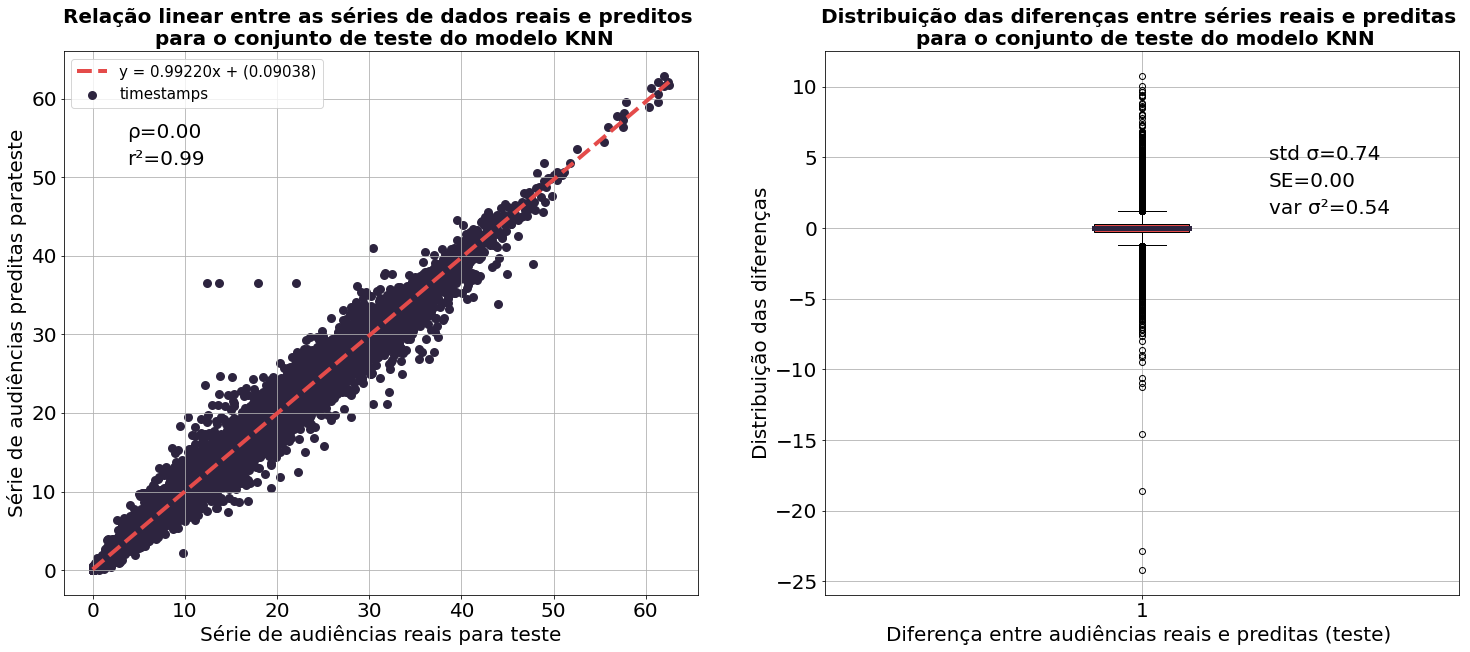

In [ ]:
a, b, c, d, e = grafico_metricas(y_test, test_pred, "teste", "KNN")

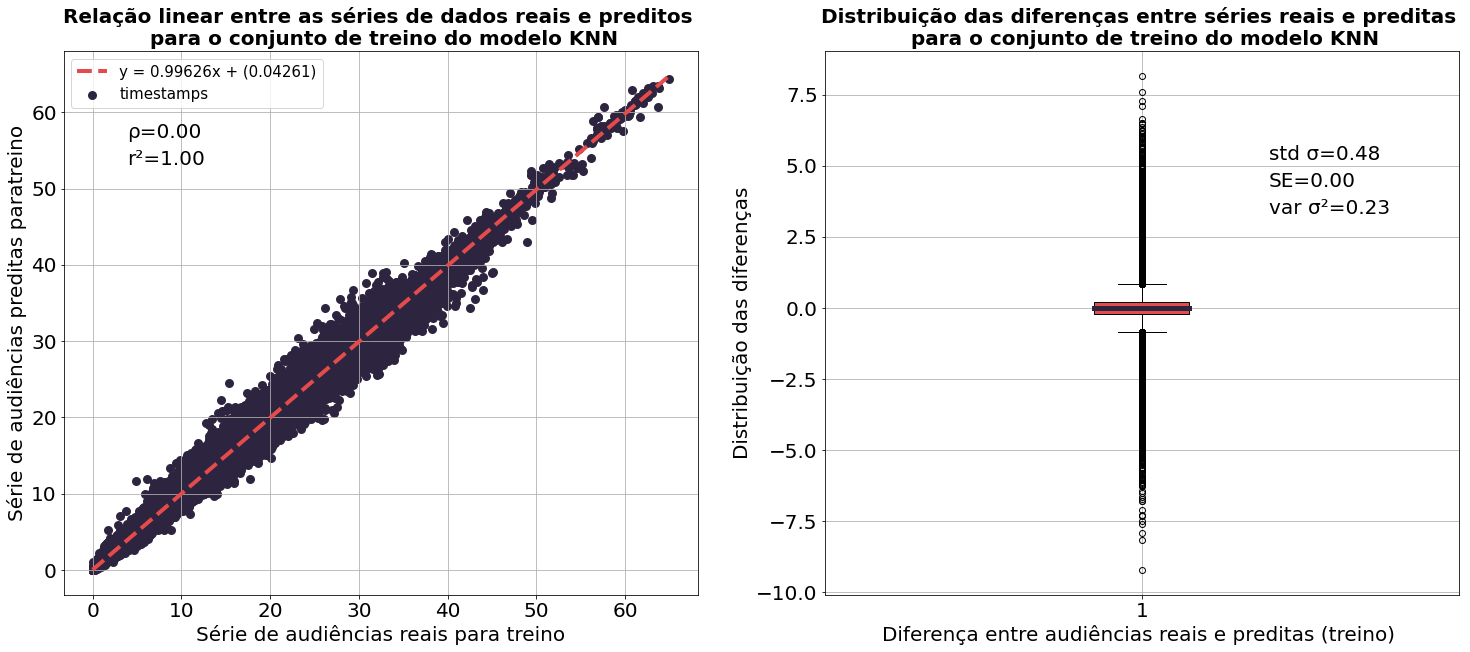

In [ ]:
f, g, h, i, j = grafico_metricas(y_train, train_pred, "treino", "KNN")

**Criação de dataframe com as informações de métricas do modelo no teste e no treino**

In [ ]:
dic_results_teste = {'Modelo': 'KNN', 'Tipo_de_dado':['Teste','Treino'], 'r²':[a,f], 'ρ':[b,g] ,'std σ':[c,h],'SE':[d,i], 'var':[e,j]}
results_teste_df = pd.DataFrame(data=dic_results_teste)
results_teste_df

,Modelo,Tipo_de_dado,r²,ρ,std σ,SE,var
0,KNN,Teste,0.99,0.0,0.736970,0.002143,0.543125
1,KNN,Treino,1.00,0.0,0.476215,0.000582,0.226781


# Hiperparametrização

O Grid Search é uma técnica utilizada para testarmos possibilidade de parâmetros diferentes de um modelo preditivo. Seu diferencial é que ele testa todas as possibilidade possíveis, assim, descobrindo sempre qual é a melhor. Aqui utilizamos essa técnica para descobrirmos os melhores parâmetros do modelo KNN.

**Criação de um dicionário contendo as informações para teste do Grid Search**

No dicionário temos as informações de "n_neighbors" e "p", sendo elas, a quantidade de vizinhos de K que o modelo irá considerar na avaliação e a métrica utilizada para medir a distância entre valores, respectivamente.

In [ ]:
grid_params = { 'n_neighbors' : [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30],'p' : [1,2]}

**Criação do Grid Search e inserção dos parâmetros**

Importamos a biblioteca do Grid Search, e ao criar o modelo, inserimos o dicionário que criamos acima.

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(KNeighborsRegressor(),grid_params,scoring='r2')

**Inserção de valores para treino**

No modelo criado, inserimos os datasets de treino

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         24, 26, 28, 30],
                         'p': [1, 2]},
             scoring='r2')

**Melhor execução**

Após o treino, printamos os melhores parâmetros e a pontuação que eles obtiveram

In [ ]:
print(gs.best_score_)
print(gs.best_params_)

0.9878205450182657
{'n_neighbors': 2, 'p': 1}


**Predição utilizando o Grid Search**

In [ ]:
gs_predict = gs.predict(X_test)

**Métricas da predição do Grid Search**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(y_test, gs_predict)) #R quadrado
print(mean_absolute_error(y_test, gs_predict)) #erro médio absoluto
print(mean_squared_error(y_test, gs_predict)) #erro médio quadrático

0.9914203379733273
0.46964639590132057
0.5431202530816185
